In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import os
from bokeh.plotting import figure, show 
from bokeh.charts import Bar
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')


Loading BokehJS ...

In [2]:
# To start off, we have to create a connection to the sqlite3 database as such:
conn = sqlite3.connect('../input/database.sqlite')
# Once we have our connection setup in python, we can create a Cursor object from which we can call the execute( ) method and to perform SQL statements and queries.
c = conn.cursor()
# Having created our cursor object, we can now execute our SQL statement. I



In [3]:
for row in c.execute(
                    # SQL statement 
                    """
                        SELECT   * 
                        FROM     Country 
                        LIMIT    1
                        
                     """ ):
    print(row)

('AFG', 'Afghanistan', 'Afghanistan', 'Islamic State of Afghanistan', 'AF', 'Afghan afghani', 'Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.', 'South Asia', 'Low income', 'AF', '2002/03', '', 'Value added at basic prices (VAB)', 'IDA', 'HIPC', 'Country uses the 1993 System of National Accounts methodology.', '', '', '', 'Actual', 'General trade system', 'Consolidated central government', 'General Data Dissemination System (GDDS)', '1979', 'Multiple Indicator Cluster Survey (MICS), 2010/11', 'Integrated household survey (IHS), 2008', '', '2013/14', '', 2013, 2000)


In [4]:
# Store Country data in a pandas dataframe via a SQL query
Country = pd.read_sql(
                       """
                       
                        SELECT  * 
                        FROM    Country
                        
                       """, con=conn)

In [5]:
# Pandas code
Country.head(3)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001


In [6]:
# SQL query 
pd.read_sql(
            """
                SELECT   * 
                FROM     Country 
                LIMIT    3 
                
            """, con=conn)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001


In [7]:
# Pandas Boolean Indexing
Country[Country['CountryCode'] == 'USA']

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
234,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,High income: OECD,US,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,,"Labor force survey (LFS), 2010",Yes,2012,2008,2013,2005


In [8]:
# SQL WHERE clause
pd.read_sql(
        """ 
            SELECT   * 
            FROM     Country 
            WHERE    CountryCode = 'USA'
            
        """, con=conn)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,High income: OECD,US,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,,"Labor force survey (LFS), 2010",Yes,2012,2008,2013,2005


In [9]:
# SQL GROUP BY Clause
pd.read_sql(
        """ 
            SELECT      Region
                        ,COUNT(*) AS [Count]
            FROM        Country 
            GROUP BY    Region
            ORDER BY    2 DESC
            
        """, con=conn)

,Region,Count
0,Europe & Central Asia,57
1,Sub-Saharan Africa,48
2,Latin America & Caribbean,41
3,East Asia & Pacific,36
4,,33
5,Middle East & North Africa,21
6,South Asia,8
7,North America,3


In [10]:
# Let's do a LEFT JOIN on some subqueries 
pd.read_sql(
        """ 
           
            SELECT      A.CountryCode
                        ,B.ShortName
                        ,B.CurrencyUnit
                        ,B.IncomeGroup
            FROM       ( 
                            -- First subquery (i.e the Left table)
                            
                           SELECT      CountryCode
                                        ,ShortName
                                        ,CurrencyUnit
                                        ,IncomeGroup
                           FROM        Country
                           WHERE       CountryCode IN ('USA','MEX', 'GBR', 'FRA')
                        ) AS A
            LEFT JOIN   (
                            -- Second subquery (i.e the right table )
                            
                            SELECT      CountryCode
                                        ,ShortName
                                        ,CurrencyUnit
                                        ,IncomeGroup
                            FROM        Country AS A
                            WHERE       CountryCode IN ('USA','MEX', 'URY', 'BEL')
                            
                          ) AS B
            ON          A.CountryCode = B.CountryCode    
            
        """, con=conn)

,CountryCode,ShortName,CurrencyUnit,IncomeGroup
0,FRA,None,None,None
1,MEX,Mexico,Mexican peso,Upper middle income
2,GBR,None,None,None
3,USA,United States,U.S. dollar,High income: OECD


In [11]:
# UNION 
pd.read_sql(
        """ 
                           SELECT      CountryCode
                                        ,ShortName
                                        ,CurrencyUnit
                                        ,IncomeGroup
                           FROM        Country
                           WHERE       CountryCode IN ('USA','MEX', 'GBR', 'FRA')
                       
                           UNION
                           
                           SELECT      CountryCode
                                        ,ShortName
                                        ,CurrencyUnit
                                        ,IncomeGroup
                           FROM        Country AS A
                           WHERE       CountryCode IN ('USA','MEX', 'URY', 'BEL')
            
        """, con=conn)

,CountryCode,ShortName,CurrencyUnit,IncomeGroup
0,BEL,Belgium,Euro,High income: OECD
1,FRA,France,Euro,High income: OECD
2,GBR,United Kingdom,Pound sterling,High income: OECD
3,MEX,Mexico,Mexican peso,Upper middle income
4,URY,Uruguay,Uruguayan peso,High income: nonOECD
5,USA,United States,U.S. dollar,High income: OECD


In [12]:
# INTERSECT 
pd.read_sql(
        """ 
                           SELECT      CountryCode
                                        ,ShortName
                                        ,CurrencyUnit
                                        ,IncomeGroup
                           FROM        Country
                           WHERE       CountryCode IN ('USA','MEX', 'GBR', 'FRA')
                       
                           INTERSECT
                           
                           SELECT      CountryCode
                                        ,ShortName
                                        ,CurrencyUnit
                                        ,IncomeGroup
                           FROM        Country AS A
                           WHERE       CountryCode IN ('USA','MEX', 'URY', 'BEL')
            
        """, con=conn)

,CountryCode,ShortName,CurrencyUnit,IncomeGroup
0,MEX,Mexico,Mexican peso,Upper middle income
1,USA,United States,U.S. dollar,High income: OECD


A quick description of the indicators are as follows:

AG.LND.PRCP.MM : Average precipitation in depth (mm per year)

EG.ELC.ACCS.ZS : Access to electricity (% of population)

EG.ELC.FOSL.ZS : Electricity production from oil, gas and coal sources (% of total)

SG.VAW.REAS.ZS : Women who believe that a husband is justified in beating his wife (any of the five reasons)

SM.POP.NETM : Net migration

In [13]:
Indicators = pd.read_sql(""" SELECT   * 
                             FROM     Indicators 
                             WHERE    IndicatorCode IN 
                                      (  'AG.LND.PRCP.MM, AG.LND.FRST.K2'
                                       , 'EG.ELC.ACCS.ZS', 'EG.ELC.FOSL.ZS'
                                       , 'EN.POP.DNST', 'SG.VAW.REAS.ZS'
                                       , 'SM.POP.NETM', 'SP.POP.65UP.TO.ZS'
                                       , 'FI.RES.TOTL.DT.ZS', 'GC.DOD.TOTL.GD.ZS'
                                       , 'MS.MIL.XPND.GD.ZS','SI.POV.GINI'
                                       , 'IP.JRN.ARTC.SC', 'SE.ADT.1524.LT.ZS'
                                      )  
                        """, con=conn)

In [14]:
#Regions = ['ARB', 'EUU', 'LCN' , 'NAC',  'EAS', 'SSF', 'World']
gini = Indicators[Indicators['IndicatorCode']== 'SI.POV.GINI']

In [15]:
gini.CountryCode.unique()


array(['AUS', 'BRA', 'CAN', 'CHN', 'CRI', 'ETH', 'THA', 'URY', 'VEN',
       'BGD', 'IND', 'IDN', 'MYS', 'MEX', 'MAR', 'NPL', 'RWA', 'BWA',
       'CIV', 'NGA', 'PER', 'PHL', 'POL', 'LKA', 'TUN', 'ARG', 'DOM',
       'GTM', 'HND', 'IRN', 'ISR', 'JOR', 'LSO', 'USA', 'CHL', 'ECU',
       'GHA', 'HUN', 'MRT', 'PAK', 'SVN', 'TUR', 'BLR', 'COL', 'HRV',
       'CZE', 'EST', 'JAM', 'KAZ', 'KGZ', 'LVA', 'LTU', 'MDA', 'RUS',
       'SVK', 'TTO', 'TKM', 'UKR', 'UZB', 'BGR', 'PAN', 'ROM', 'UGA',
       'BOL', 'PRY', 'SLV', 'GIN', 'SEN', 'TZA', 'ZMB', 'BDI', 'CAF',
       'KEN', 'LAO', 'NER', 'VNM', 'BLZ', 'GNB', 'MDG', 'NIC', 'ZAF',
       'BFA', 'KHM', 'MLI', 'SWZ', 'DZA', 'AZE', 'MNG', 'LCA', 'ALB',
       'ARM', 'CMR', 'GEO', 'MOZ', 'PNG', 'MWI', 'GMB', 'GUY', 'MKD',
       'MDV', 'SYC', 'SUR', 'TJK', 'AGO', 'FSM', 'STP', 'BIH', 'CPV',
       'HTI', 'TMP', 'DJI', 'FJI', 'SRB', 'BEN', 'BTN', 'TCD', 'KSV',
       'NAM', 'SLE', 'AUT', 'BEL', 'COM', 'ZAR', 'CYP', 'DNK', 'FIN',
       'FRA', 'GRC',

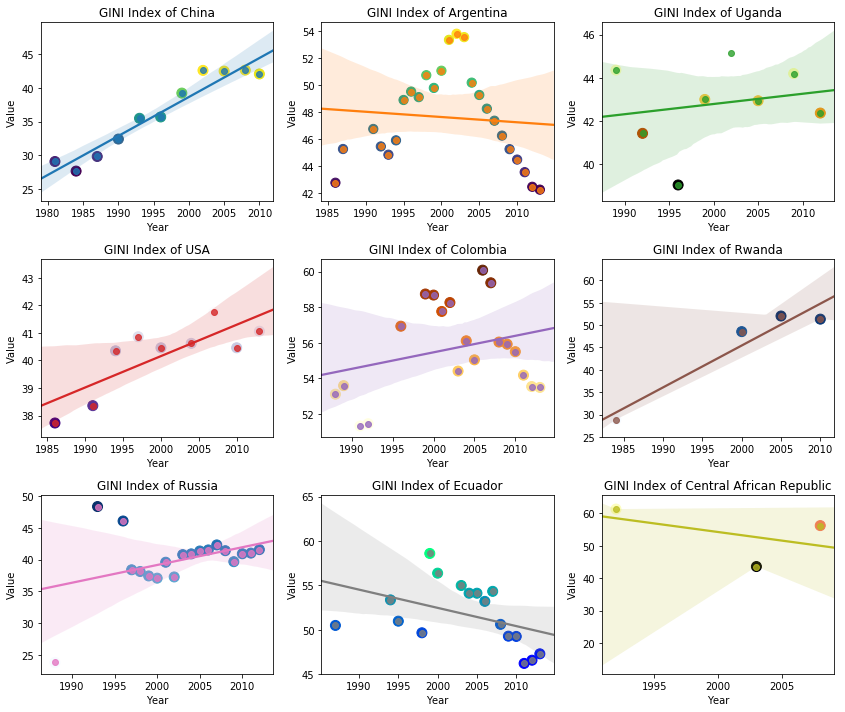

In [16]:
# Plotting a Subplot of the Seaborn regplot
f, ((ax1, ax2, ax3), (ax4,ax5,ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,figsize=(12,10))

# Plot of GINI index of China
points = ax1.scatter(gini[gini['CountryCode'] == 'CHN']["Year"], gini[gini['CountryCode'] == 'CHN']["Value"],
                     c=gini[gini['CountryCode'] == 'CHN']["Value"], s=100, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'CHN'], ax=ax1)
ax1.set_title("GINI Index of China")

# Plot of GINI of Argentina
points = ax2.scatter(gini[gini['CountryCode'] == 'ARG']["Year"], gini[gini['CountryCode'] == 'ARG']["Value"],
                     c=gini[gini['CountryCode'] == 'ARG']["Value"], s=85, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'ARG'], ax=ax2)
ax2.set_title("GINI Index of Argentina")

points = ax3.scatter(gini[gini['CountryCode'] == 'UGA']["Year"], gini[gini['CountryCode'] == 'UGA']["Value"],
                     c=gini[gini['CountryCode'] == 'UGA']["Value"], s=100, cmap="afmhot")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'UGA'], ax=ax3)
ax3.set_title("GINI Index of Uganda")

points = ax4.scatter(gini[gini['CountryCode'] == 'USA']["Year"], gini[gini['CountryCode'] == 'USA']["Value"],
                     c=gini[gini['CountryCode'] == 'USA']["Value"], s=100, cmap="Purples_r")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'USA'], ax=ax4)
ax4.set_title("GINI Index of USA")

points = ax5.scatter(gini[gini['CountryCode'] == 'COL']["Year"], gini[gini['CountryCode'] == 'COL']["Value"],
                     c=gini[gini['CountryCode'] == 'COL']["Value"], s=100, cmap="YlOrBr")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'COL'], ax=ax5)
ax5.set_title("GINI Index of Colombia")

points = ax6.scatter(gini[gini['CountryCode'] == 'RWA']["Year"], gini[gini['CountryCode'] == 'RWA']["Value"],
                     c=gini[gini['CountryCode'] == 'RWA']["Value"], s=100, cmap="Blues")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'RWA'], ax=ax6)
ax6.set_title("GINI Index of Rwanda")

points = ax7.scatter(gini[gini['CountryCode'] == 'RUS']["Year"], gini[gini['CountryCode'] == 'RUS']["Value"],
                     c=gini[gini['CountryCode'] == 'RUS']["Value"], s=100, cmap="Blues")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'RUS'], ax=ax7)
ax7.set_title("GINI Index of Russia")

points = ax8.scatter(gini[gini['CountryCode'] == 'ECU']["Year"], gini[gini['CountryCode'] == 'ECU']["Value"],
                     c=gini[gini['CountryCode'] == 'ECU']["Value"], s=100, cmap="winter")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'ECU'], ax=ax8)
ax8.set_title("GINI Index of Ecuador")

points = ax9.scatter(gini[gini['CountryCode'] == 'CAF']["Year"], gini[gini['CountryCode'] == 'CAF']["Value"],
                     c=gini[gini['CountryCode'] == 'CAF']["Value"], s=100, cmap="magma")
sns.regplot("Year", "Value", data=gini[gini['CountryCode'] == 'CAF'], ax=ax9)
ax9.set_title("GINI Index of Central African Republic")
sns.set_style(style="dark")
plt.tight_layout()